<a href="https://colab.research.google.com/github/Meowmixforme/Kaggle_Machine_Learning_Projects/blob/main/Project%203%20Exoplanet%20Hunting%20Using%20Machine%20Learning/Exo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exoplanet Hunting

Author: James Fothergill

Import Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

Getting the data

In [5]:
train_df = pd.read_csv("/content/exoTrain.csv")
train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [6]:
# Shape of the training df

train_df.shape

(1253, 3198)

Check for missing values (there are none)

In [7]:
# Display the rows with null values in df

train_df[train_df.isnull().any(axis=1)]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
1252,1,-16.63,19.89,-2.34,21.38,-12.74,-27.25,-12.85,-11.16,21.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

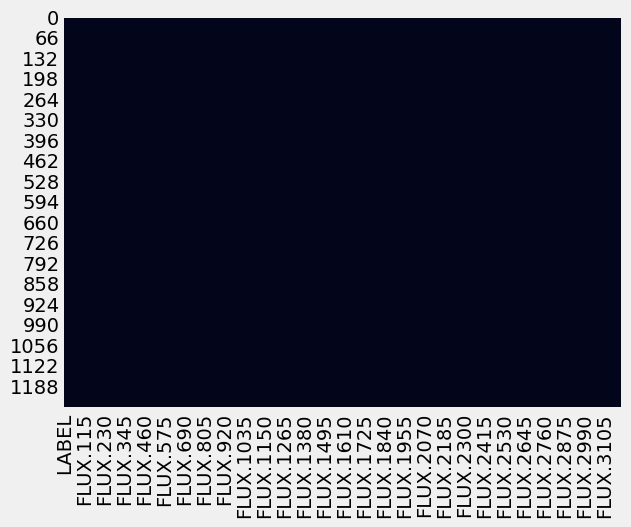

In [8]:
# Display null values in train df
sns.heatmap(train_df.isnull(), cbar=False)

Decoding labels in the data

In [9]:
# Check how many labels are present in train df

train_df['LABEL'].value_counts()

,count
LABEL,
1,1216
2,37


In [10]:
# Extract the index for the stars labelled as 2

list(train_df[train_df['LABEL'] ==2].index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

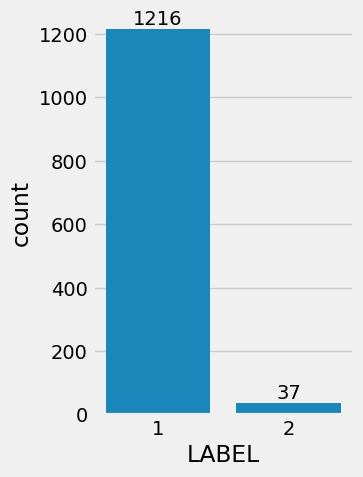

In [20]:
plt.figure(figsize=(3,5))
ax = sns.countplot(x='LABEL', data=train_df) # Specify 'x=' for the column
ax.bar_label(ax.containers[0])
plt.show()

Replacing the labels

In [23]:
# Replacing labels

train_df['LABEL'] = train_df['LABEL'].replace({2: 1, 1: 0})
train_df.LABEL.unique()

array([1, 0])